In [1]:
#Description This program uses the MACD crossover
#to determine when to buy and sell stock.


In [3]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [7]:
#loading data
nifty=pd.read_csv('nifty.csv',index_col='Date',parse_dates=True)
nifty

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-11-01,8653.150391,8669.599609,8614.500000,8626.250000,8626.250000,165000.0
2016-11-02,8542.799805,8549.500000,8504.849609,8514.000000,8514.000000,155300.0
2016-11-03,8499.849609,8537.650391,8476.150391,8484.950195,8484.950195,170500.0
2016-11-04,8503.599609,8504.000000,8400.250000,8433.750000,8433.750000,224800.0
2016-11-07,8535.750000,8535.849609,8481.450195,8497.049805,8497.049805,172800.0
...,...,...,...,...,...,...
2021-10-25,18229.500000,18241.400390,17968.500000,18125.400390,18125.400390,418700.0
2021-10-26,18154.500000,18310.449220,18099.300780,18268.400390,18268.400390,341400.0
2021-10-27,18295.849610,18342.050780,18167.900390,18210.949220,18210.949220,335200.0


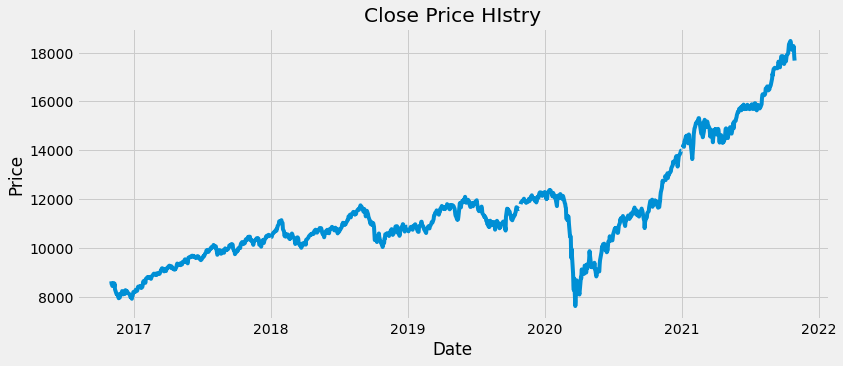

In [10]:
#visually show the stock price
plt.figure(figsize=(12,5))
plt.plot(nifty['Adj Close'],label='Close')
plt.title('Close Price HIstry')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [14]:
#Calcultion for MACD line and signal line
#short term moving average EMA
ShortEMA=nifty.Close.ewm(span=12,adjust=False).mean()
LongEMA=nifty.Close.ewm(span=25,adjust=False).mean()
print(ShortEMa)
print(LongEMA)

Date
2016-11-01     8626.250000
2016-11-02     8608.980769
2016-11-03     8589.899142
2016-11-04     8565.876197
2016-11-07     8555.287522
                  ...     
2021-10-25    18113.098005
2021-10-26    18136.990680
2021-10-27    18148.368917
2021-10-28    18103.581391
2021-10-29    18037.130468
Name: Close, Length: 1236, dtype: float64
Date
2016-11-01     8626.250000
2016-11-02     8617.615385
2016-11-03     8607.410370
2016-11-04     8594.051880
2016-11-07     8586.590182
                  ...     
2021-10-25    17896.614144
2021-10-26    17925.213086
2021-10-27    17947.192789
2021-10-28    17940.274113
2021-10-29    17919.610750
Name: Close, Length: 1236, dtype: float64


In [17]:
#Calculating MACD line
MACD=ShortEMA-LongEMA
print(MACD)

Date
2016-11-01      0.000000
2016-11-02     -8.634615
2016-11-03    -17.511228
2016-11-04    -28.175683
2016-11-07    -31.302660
                 ...    
2021-10-25    216.483861
2021-10-26    211.777593
2021-10-27    201.176128
2021-10-28    163.307278
2021-10-29    117.519718
Name: Close, Length: 1236, dtype: float64


In [22]:
#creating signal line
signal=MACD.ewm(span=9,adjust=False).mean()
print(signal)


Date
2016-11-01      0.000000
2016-11-02     -1.726923
2016-11-03     -4.883784
2016-11-04     -9.542164
2016-11-07    -13.894263
                 ...    
2021-10-25    236.372984
2021-10-26    231.453906
2021-10-27    225.398350
2021-10-28    212.980136
2021-10-29    193.888052
Name: Close, Length: 1236, dtype: float64


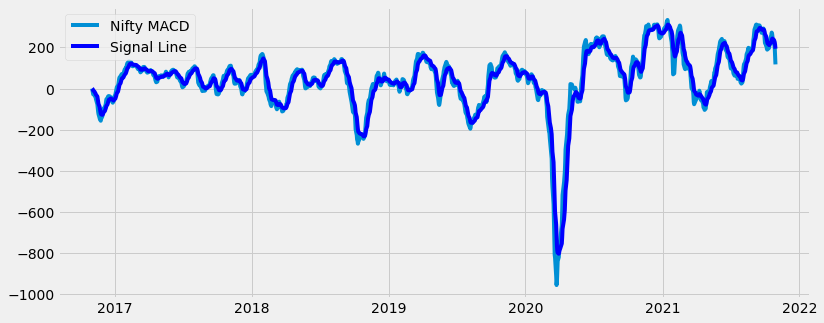

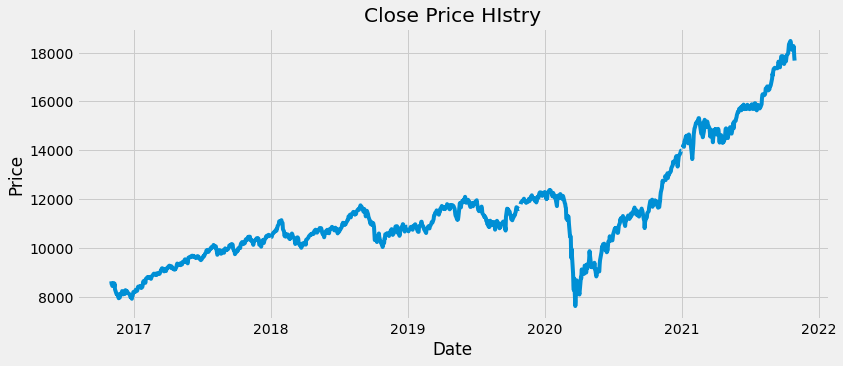

In [40]:
nifty





plt.figure(figsize=(12,5))
plt.plot(nifty.index,MACD,label='Nifty MACD')
plt.plot(nifty.index,signal,label='Signal Line',color='blue')
plt.legend(loc='upper left')
plt.show()




plt.figure(figsize=(12,5))
plt.plot(nifty['Adj Close'],label='Close')
plt.title('Close Price HIstry')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [32]:
#create new column for the data
nifty['MACD']=MACD
nifty['Signal Line']=signal
nifty

,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Lne,Signal Line
Date,,,,,,,,,
2016-11-01,8653.150391,8669.599609,8614.500000,8626.250000,8626.250000,165000.0,0.000000,0.000000,0.000000
2016-11-02,8542.799805,8549.500000,8504.849609,8514.000000,8514.000000,155300.0,-8.634615,-1.726923,-1.726923
2016-11-03,8499.849609,8537.650391,8476.150391,8484.950195,8484.950195,170500.0,-17.511228,-4.883784,-4.883784
2016-11-04,8503.599609,8504.000000,8400.250000,8433.750000,8433.750000,224800.0,-28.175683,-9.542164,-9.542164
2016-11-07,8535.750000,8535.849609,8481.450195,8497.049805,8497.049805,172800.0,-31.302660,-13.894263,-13.894263
...,...,...,...,...,...,...,...,...,...
2021-10-25,18229.500000,18241.400390,17968.500000,18125.400390,18125.400390,418700.0,216.483861,236.372984,236.372984
2021-10-26,18154.500000,18310.449220,18099.300780,18268.400390,18268.400390,341400.0,211.777593,231.453906,231.453906
2021-10-27,18295.849610,18342.050780,18167.900390,18210.949220,18210.949220,335200.0,201.176128,225.398350,225.398350


In [53]:
#creating a function to signal when to buy and sell an asset
def buy_sell(nifty):
    Buy=[]
    Sell=[]
    flag=-1
    for i in range(0,len(nifty)):
        if nifty['MACD'][i]>nifty['Signal Line'][i]:
            Sell.append(np.nan)
            if flag !=1:
                Buy.append(nifty['Close'][i])
                flat=1
            else:
                Buy.append(np.nan)
        elif nifty['MACD'][i]<nifty['Signal Line'][i]:
            Buy.append(np.nan)
            if flag !=0:
                Sell.append(nifty['Close'][i])
                flat=0
            else:
                Sell.append(np.nan)
        else:
            Buy.append(np.nan)
            Sell.append(np.nan)
    return (Buy, Sell)
    

            
    
    
    
    
    
    
    
    

In [54]:
#Create buy and sell column
a=buy_sell(nifty)
nifty['Buy_Signal_Price']=a[0]
nifty['Sell_Signal_Price']=a[1]


In [56]:
nifty

,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Lne,Signal Line,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,,,,,,,
2016-11-01,8653.150391,8669.599609,8614.500000,8626.250000,8626.250000,165000.0,0.000000,0.000000,0.000000,NaN,NaN
2016-11-02,8542.799805,8549.500000,8504.849609,8514.000000,8514.000000,155300.0,-8.634615,-1.726923,-1.726923,NaN,8514.000000
2016-11-03,8499.849609,8537.650391,8476.150391,8484.950195,8484.950195,170500.0,-17.511228,-4.883784,-4.883784,NaN,8484.950195
2016-11-04,8503.599609,8504.000000,8400.250000,8433.750000,8433.750000,224800.0,-28.175683,-9.542164,-9.542164,NaN,8433.750000
2016-11-07,8535.750000,8535.849609,8481.450195,8497.049805,8497.049805,172800.0,-31.302660,-13.894263,-13.894263,NaN,8497.049805
...,...,...,...,...,...,...,...,...,...,...,...
2021-10-25,18229.500000,18241.400390,17968.500000,18125.400390,18125.400390,418700.0,216.483861,236.372984,236.372984,NaN,18125.400390
2021-10-26,18154.500000,18310.449220,18099.300780,18268.400390,18268.400390,341400.0,211.777593,231.453906,231.453906,NaN,18268.400390
2021-10-27,18295.849610,18342.050780,18167.900390,18210.949220,18210.949220,335200.0,201.176128,225.398350,225.398350,NaN,18210.949220


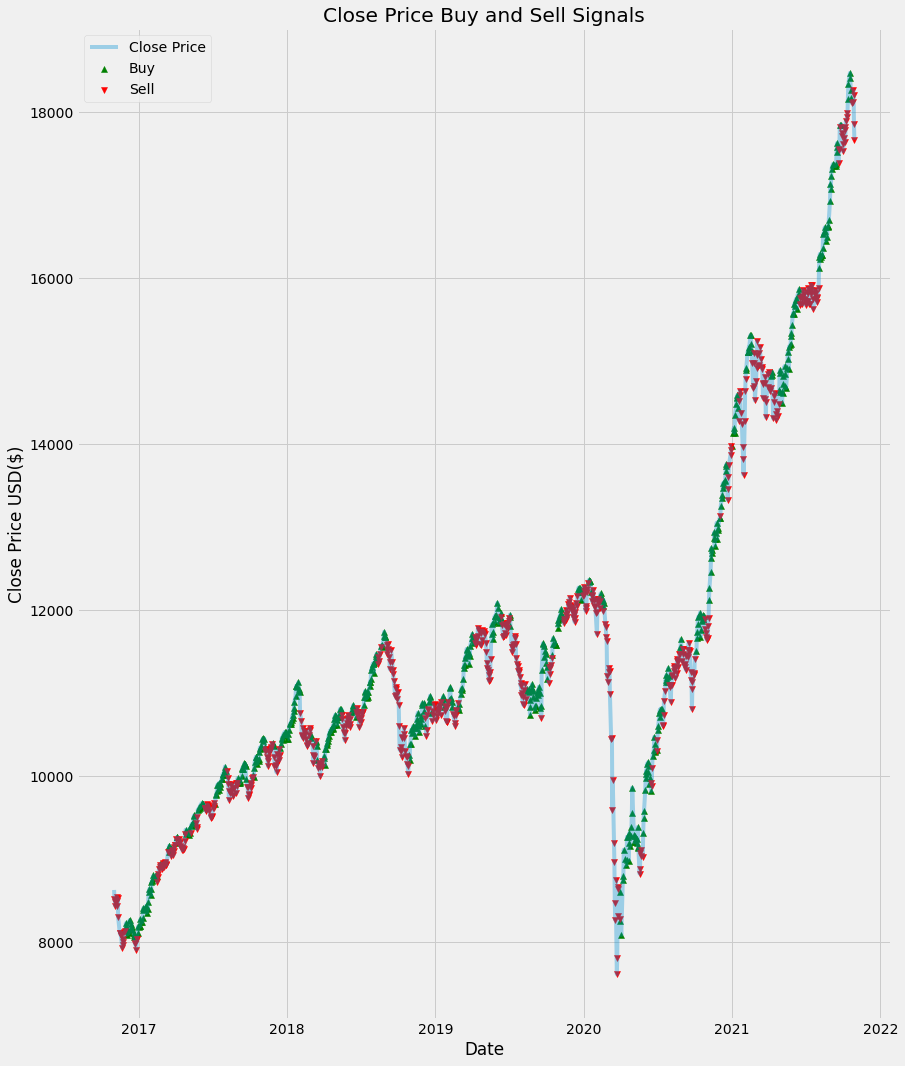

In [58]:
#visually show the buy and sell signal
plt.figure(figsize=(13,17))
plt.scatter(nifty.index,nifty['Buy_Signal_Price'],color='green',label='Buy',marker='^',alpha=1)
plt.scatter(nifty.index,nifty['Sell_Signal_Price'],color='red',label='Sell',marker='v',alpha=1)
plt.plot(nifty['Close'],label='Close Price',alpha=0.35)
plt.title('Close Price Buy and Sell Signals')
plt.xlabel('Date')
plt.ylabel('Close Price USD($)')
plt.legend(loc='upper left')
plt.show()
